In [15]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests
# Import the API key from config.py file.
from config import weather_api_key
# Import the time module.
import time

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations. Use zip() to pair them.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates= list(lat_lngs)

In [5]:
# Show the coordinates
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-3.379142095320944 -159.2018549093985
-36.647737135599435 -65.8465854944586
-37.73063323471582 -42.42219868712354
88.29447287995413 5.315813157944973
-84.04491012512084 160.3879786970847
-83.77459176306365 -105.1642534419682
82.5052317667836 -112.91994328224662
3.6287312026866516 -115.2966907710475
41.1398997669705 -68.93056423420681
-64.90412752519428 21.631459304333077
39.46916393454083 -28.904040539938308
37.15849546888178 80.40921048166922
-54.07984852481092 77.83549653034333
15.35034893215375 -123.99730985383641
43.09066340001647 96.62482490762233
11.637386843071937 -29.238730200443968
81.17565745550084 -100.26379363850029
68.13119814575114 94.59607860905896
45.73245139013176 50.04647827443566
-40.46366967326571 105.2859961413875
-6.398407880637436 134.19520190165474
-0.29637728080010106 -79.36962093358768
13.895639853058526 88.01781224146515
-75.22887284077827 -87.50107608570003
-73.11944191874724 -117.73999780313754
-60.36771729240553 -4.108883048543817
-64.06813489491523 113.00

67.69626515515489 0.905048267435177
-19.676683677876355 -6.52440298372224
62.209187840545155 119.39480888291376
-49.28185104257027 24.058864349918508
59.64056823876487 -76.21931641339732
26.169512856567493 -159.96762226799336
1.1034683991435656 -130.1725029716381
44.106214729614294 -80.84485397627842
-20.66182655686798 -4.549796797289645
-66.52447444066054 22.338163715088115
-62.102164399958376 -8.176732099392922
-25.873845183730424 7.536845396132776
-4.538807289633098 31.971721222454022
24.218990004129097 -103.22076827450341
36.11632898006384 137.04491648388432
-83.53056774799468 33.300214521957
41.654859411948905 146.55953120834397
88.79708237280494 -95.71072356193793
-89.15544739300782 -44.07570368291644
-10.228143884825656 -79.9223131369718
-72.37537690580461 48.34849054663317
-44.17462960219816 151.58676326086822
49.41061872077418 -112.32392424166385
60.001310846968266 19.38156368839708
-72.18731936427727 136.67227233409795
30.460569188581076 -8.310814720115303
8.447946355186474 -

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


621

In [7]:
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    # % is modulo: the remainder from the division of the first argument to the second
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
   
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | faanui
Processing Record 2 of Set 1 | santa rosa
Processing Record 3 of Set 1 | cidreira
Processing Record 4 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | san patricio
Processing Record 9 of Set 1 | nantucket
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | shache
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | constitucion
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | sao filipe
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | fort-shevchenko
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | tual
Processing Record 21 of Set 1 | santo domingo
Processing Record 22 of Set 1 | port blair
Processing Record 23 of Set 1 | cape town
Proces

Processing Record 38 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 39 of Set 4 | tansen
Processing Record 40 of Set 4 | russell
Processing Record 41 of Set 4 | husavik
Processing Record 42 of Set 4 | kendari
Processing Record 43 of Set 4 | luderitz
Processing Record 44 of Set 4 | kodiak
Processing Record 45 of Set 4 | saleaula
City not found. Skipping...
Processing Record 46 of Set 4 | kalabo
Processing Record 47 of Set 4 | khonuu
City not found. Skipping...
Processing Record 48 of Set 4 | mount gambier
Processing Record 49 of Set 4 | lavrentiya
Processing Record 50 of Set 4 | turayf
Processing Record 1 of Set 5 | longyearbyen
Processing Record 2 of Set 5 | khatanga
Processing Record 3 of Set 5 | tiksi
Processing Record 4 of Set 5 | caravelas
Processing Record 5 of Set 5 | ziro
Processing Record 6 of Set 5 | amderma
City not found. Skipping...
Processing Record 7 of Set 5 | bandar-e lengeh
Processing Record 8 of Set 5 | krasnorechenskiy
Processing Record 9 of Set 5 | saint-aug

Processing Record 29 of Set 8 | pinega
Processing Record 30 of Set 8 | najran
Processing Record 31 of Set 8 | teguldet
Processing Record 32 of Set 8 | staryy nadym
Processing Record 33 of Set 8 | emba
Processing Record 34 of Set 8 | broken hill
Processing Record 35 of Set 8 | rio gallegos
Processing Record 36 of Set 8 | kurumkan
Processing Record 37 of Set 8 | nossa senhora das dores
Processing Record 38 of Set 8 | pak phanang
Processing Record 39 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 40 of Set 8 | ginir
Processing Record 41 of Set 8 | kapuskasing
Processing Record 42 of Set 8 | ina
Processing Record 43 of Set 8 | xingtai
Processing Record 44 of Set 8 | acarau
Processing Record 45 of Set 8 | liuzhou
Processing Record 46 of Set 8 | aksarka
Processing Record 47 of Set 8 | green river
Processing Record 48 of Set 8 | songjianghe
Processing Record 49 of Set 8 | orsta
Processing Record 50 of Set 8 | bhatkal
Processing Record 1 of Set 9 | quatre cocos
Processi

Processing Record 16 of Set 12 | bafq
Processing Record 17 of Set 12 | kaeo
Processing Record 18 of Set 12 | hohhot
Processing Record 19 of Set 12 | moyale
Processing Record 20 of Set 12 | boralday
Processing Record 21 of Set 12 | suntar
Processing Record 22 of Set 12 | cocorit
Processing Record 23 of Set 12 | juneau
Processing Record 24 of Set 12 | sattur
Processing Record 25 of Set 12 | butzow
Processing Record 26 of Set 12 | sorvag
City not found. Skipping...
Processing Record 27 of Set 12 | praia da vitoria
Processing Record 28 of Set 12 | kungurtug
Processing Record 29 of Set 12 | maniitsoq
Processing Record 30 of Set 12 | tabukiniberu
City not found. Skipping...
Processing Record 31 of Set 12 | orel-izumrud
Processing Record 32 of Set 12 | manggar
Processing Record 33 of Set 12 | saint-sauveur-des-monts
Processing Record 34 of Set 12 | port hardy
Processing Record 35 of Set 12 | mocambique
City not found. Skipping...
Processing Record 36 of Set 12 | tlahualilo
City not found. Ski

In [9]:
# Determine length of city_data.  Needs to be over 500
len(city_data)

574

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Faanui,-16.48,-151.75,76.87,81,56,29.26,PF,2020-07-08 16:49:13
1,Santa Rosa,14.31,121.11,82.99,77,72,1.01,PH,2020-07-08 16:49:13
2,Cidreira,-30.18,-50.21,62.04,80,100,20.38,BR,2020-07-08 16:49:13
3,Bluff,-46.60,168.33,39.00,83,91,3.00,NZ,2020-07-08 16:49:13
4,Punta Arenas,-53.15,-70.92,28.40,92,75,4.70,CL,2020-07-08 16:46:29
5,Yellowknife,62.46,-114.35,59.00,62,75,9.17,CA,2020-07-08 16:49:13
6,San Patricio,19.22,-104.70,80.60,88,90,13.87,MX,2020-07-08 16:49:13
7,Nantucket,41.28,-70.10,71.60,83,1,10.29,US,2020-07-08 16:49:13
8,Bredasdorp,-34.53,20.04,62.60,55,16,2.24,ZA,2020-07-08 16:49:14
9,Ribeira Grande,38.52,-28.70,71.60,73,75,13.87,PT,2020-07-08 16:49:14


In [11]:
# Reorder columns for asthetics
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Faanui,PF,2020-07-08 16:49:13,-16.48,-151.75,76.87,81,56,29.26
1,Santa Rosa,PH,2020-07-08 16:49:13,14.31,121.11,82.99,77,72,1.01
2,Cidreira,BR,2020-07-08 16:49:13,-30.18,-50.21,62.04,80,100,20.38
3,Bluff,NZ,2020-07-08 16:49:13,-46.60,168.33,39.00,83,91,3.00
4,Punta Arenas,CL,2020-07-08 16:46:29,-53.15,-70.92,28.40,92,75,4.70
5,Yellowknife,CA,2020-07-08 16:49:13,62.46,-114.35,59.00,62,75,9.17
6,San Patricio,MX,2020-07-08 16:49:13,19.22,-104.70,80.60,88,90,13.87
7,Nantucket,US,2020-07-08 16:49:13,41.28,-70.10,71.60,83,1,10.29
8,Bredasdorp,ZA,2020-07-08 16:49:14,-34.53,20.04,62.60,55,16,2.24
9,Ribeira Grande,PT,2020-07-08 16:49:14,38.52,-28.70,71.60,73,75,13.87


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Begin creating a scatter plot of max temp vs latitude
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [16]:
# Get today's date in seconds.
today = time.time()
today

1594227601.9103951

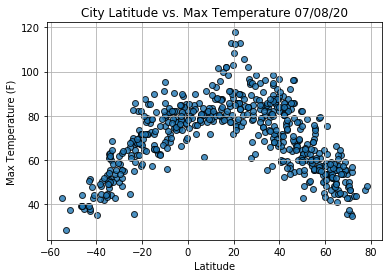

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

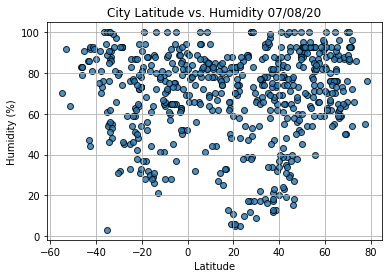

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


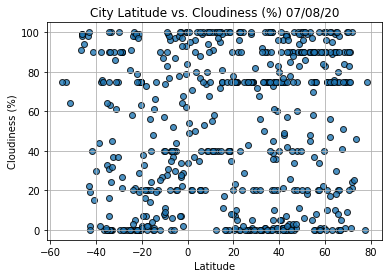

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()
